In [1]:
# Carrega as bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # importa o Decision Tree Classifier
from sklearn.model_selection import train_test_split # importa o método train_test_split 
from sklearn import metrics #importa as métricas de avaliação de modelos do scikit-learn

In [2]:
# Define as colunas
#col_names = ['aspecto','temperatura','umidade','vento','label']
# Carrega o dataset
#pima = pd.read_csv("jogar_real.csv", header=None, names=col_names)
#label 0=não 1=sim

# Define as colunas
#col_names = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'label']
col_names = ['ta_native', 'course_instr', 'course', 'summer_regular', 'class_size', 'label']
# Carrega o dataset
pima = pd.read_csv("tae.csv", header=None, names=col_names)
#label 0=não 1=sim


     ta_native  course_instr  course  summer_regular  class_size  label
0            1            23       3               1          19      3
1            2            15       3               1          17      3
2            1            23       3               2          49      3
3            1             5       2               2          33      3
4            2             7      11               2          55      3
..         ...           ...     ...             ...         ...    ...
146          2             3       2               2          26      1
147          2            10       3               2          12      1
148          1            18       7               2          48      1
149          2            22       1               2          51      1
150          2             2      10               2          27      1

[151 rows x 6 columns]


In [3]:
#pima.head()

In [4]:
#Separa o conjunto de dados em atributos previsores e atributo alvo/meta
#feature_cols = ['pregnancies', 'insulin', 'bmi', 'age','glucose','bloodpressure','diabetespedigreefunction']
feature_cols = ['ta_native', 'course_instr', 'course', 'summer_regular', 'class_size']
X = pima[feature_cols] # Características (atributos previsores)
y = pima.label # Atributo/variável alvo
#print(X)
#print(y)

In [5]:
# Separa o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # 60% treinamento e 40% teste
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

In [6]:
# Cria o objeto classificador para a árvore de decisão
clf = DecisionTreeClassifier()

# Treina o objeto classificador
clf = clf.fit(X_train,y_train)

# Realiza a predição a partir do conjunto de teste
y_pred = clf.predict(X_test)
#print(y_test)
#print(y_pred)

In [7]:
# Apresenta a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1 Measure:",metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.6557377049180327
Precision: 0.6566764132553606
Recall: 0.6547619047619048
F1 Measure: 0.6527113237639554


In [8]:
# Utiliza o pickle para salvar o modelo treinado para uso posterior em alguma aplicação
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

y_pred = loaded_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1 Measure:",metrics.f1_score(y_test, y_pred, average='macro'))

# Predição para casos do conjunto de diabetes

print(loaded_model.predict([[1, 23, 3, 1, 19]]))
print(loaded_model.predict([[2, 22, 1, 2, 51]]))


Accuracy: 0.6557377049180327
Precision: 0.6566764132553606
Recall: 0.6547619047619048
F1 Measure: 0.6527113237639554
[3]
[1]


conda install graphviz

conda install pydotplus

!pip install --upgrade scikit-learn==0.20.3

In [9]:
import sys
#!conda install --yes --prefix {sys.prefix} graphviz
#!conda install --yes --prefix {sys.prefix} pydotplus
#!python --version
#!conda list

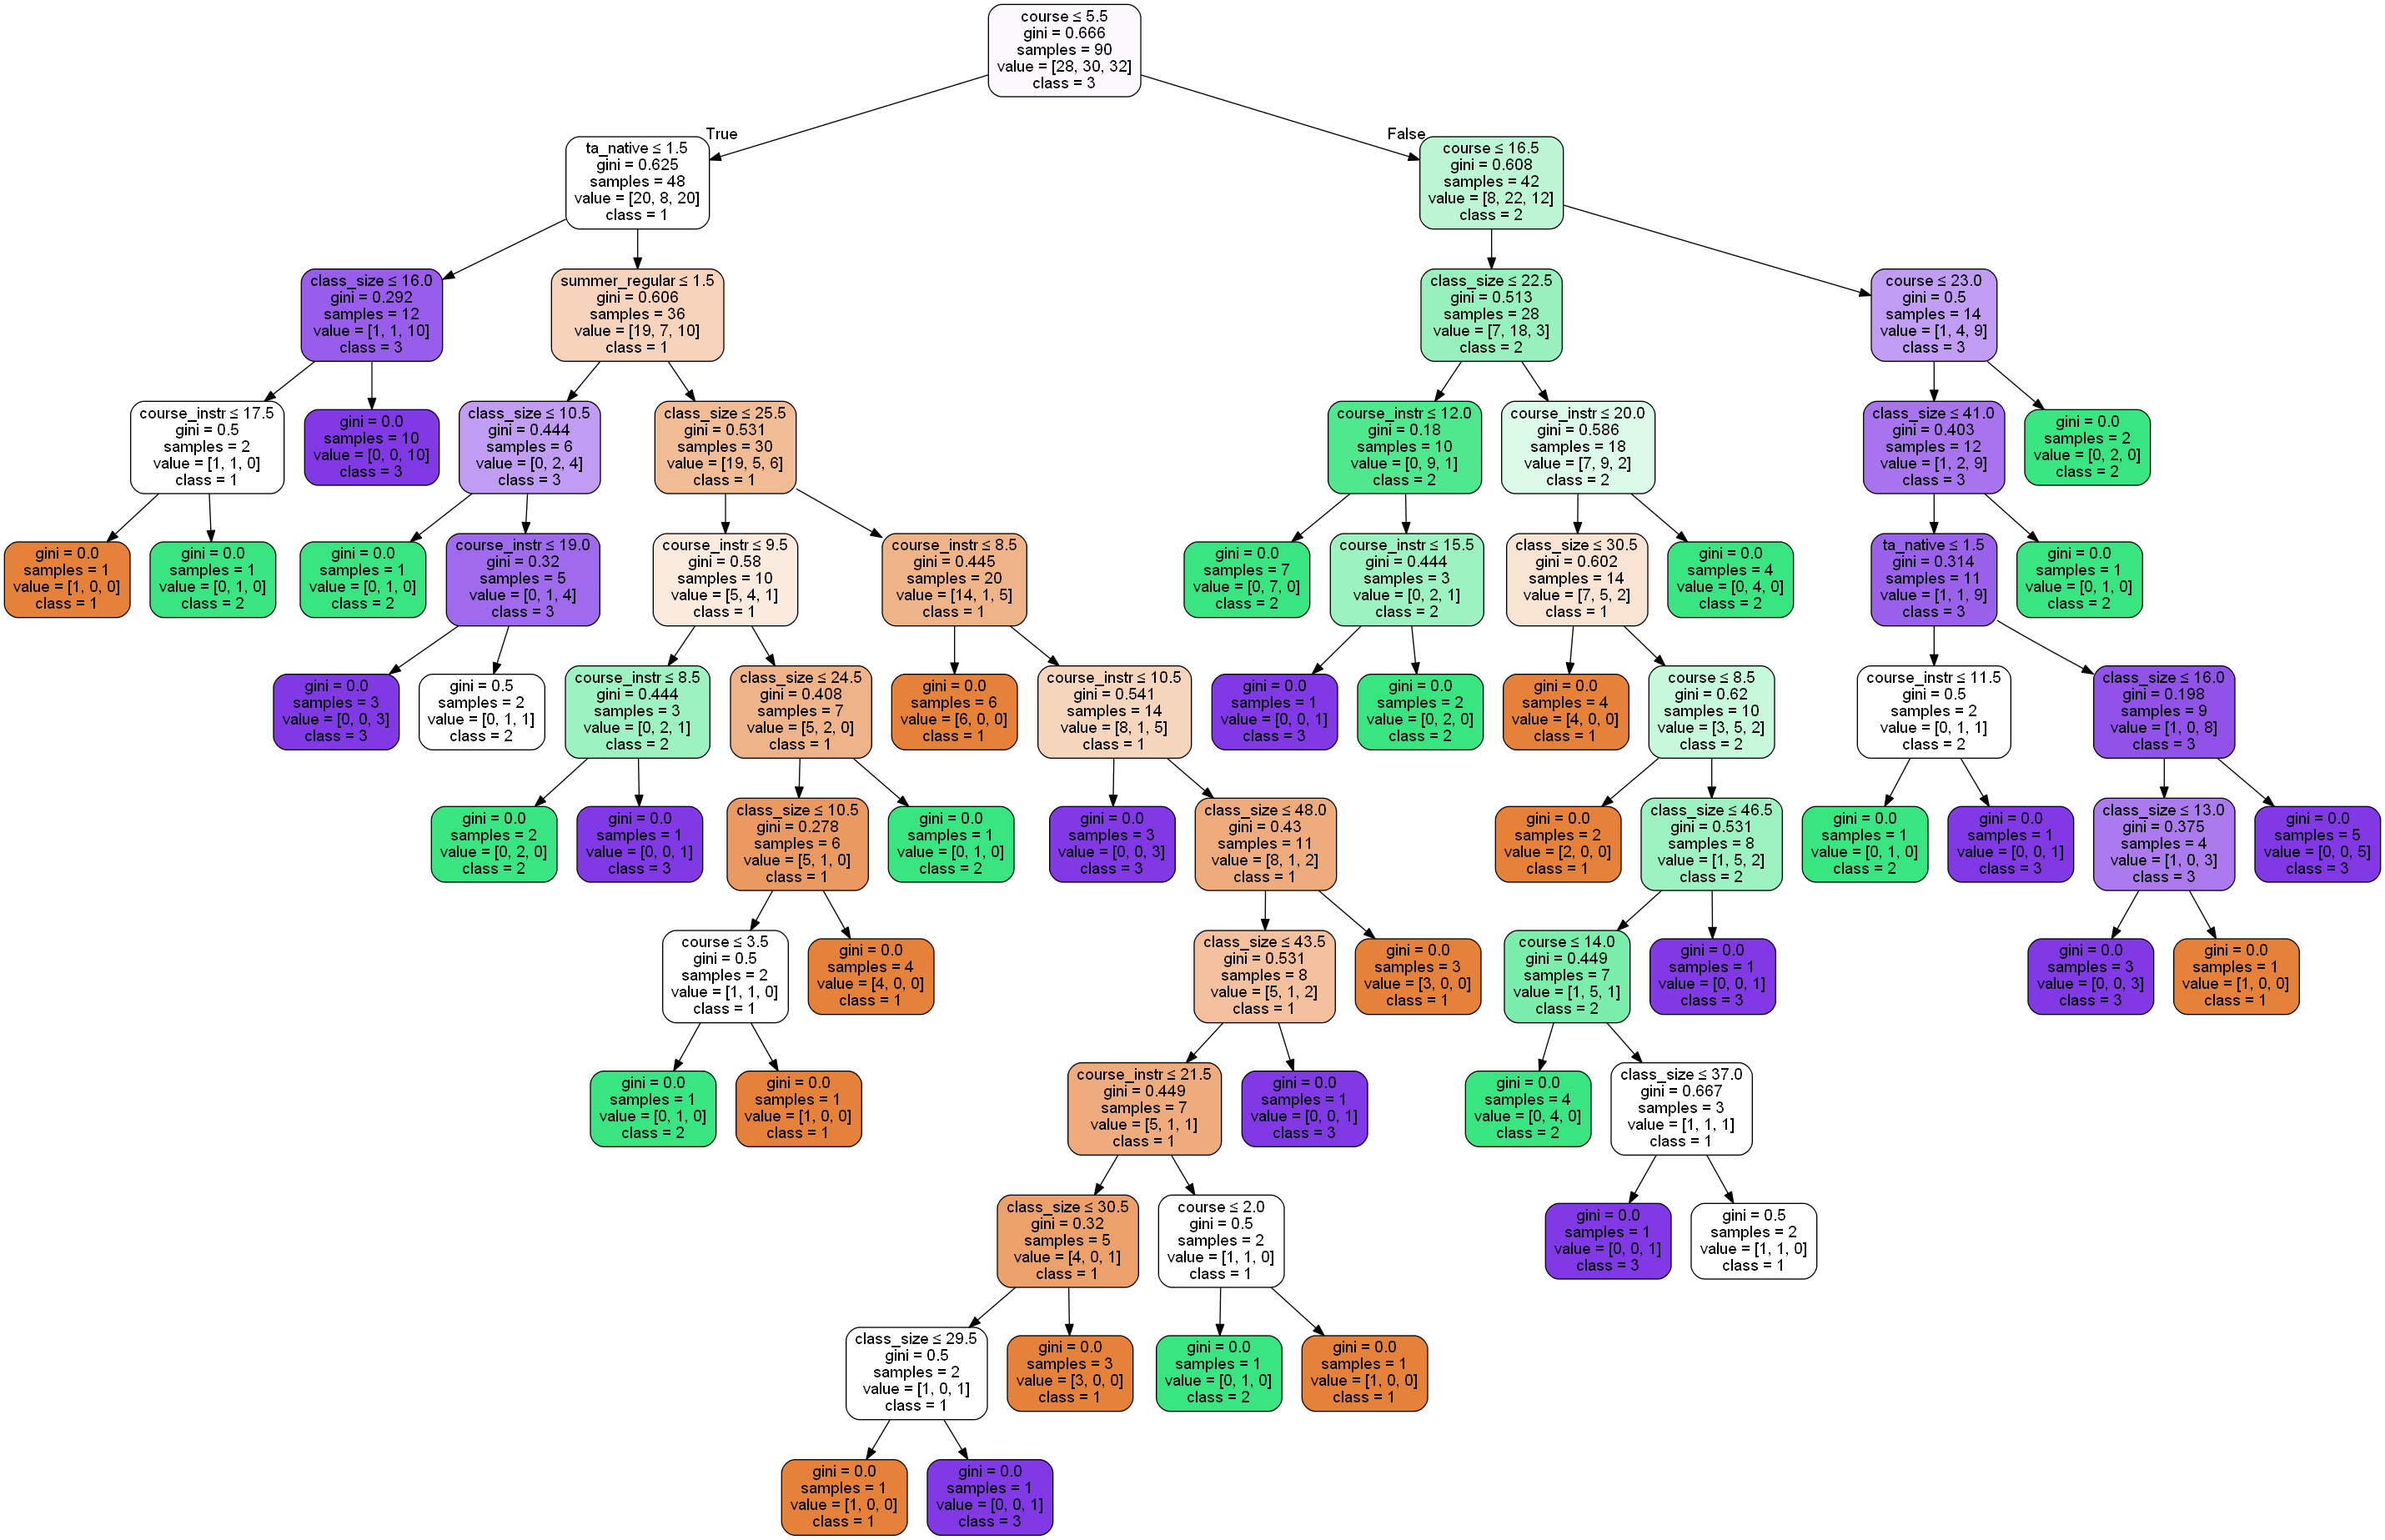

In [14]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tempo.png')
Image(graph.create_png())

In [15]:
# Cria o objeto classificador para a árvore de decisão
# Criterion é a função de medida de qualidade da separação da árvore. 
#   “gini" valor default (Gini impurity) 
#   “entropy” para information gain
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Treina o objeto classificador
clf = clf.fit(X_train,y_train)

# Realiza a predição a partir do conjunto de teste
y_pred = clf.predict(X_test)

# Apresenta a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5737704918032787


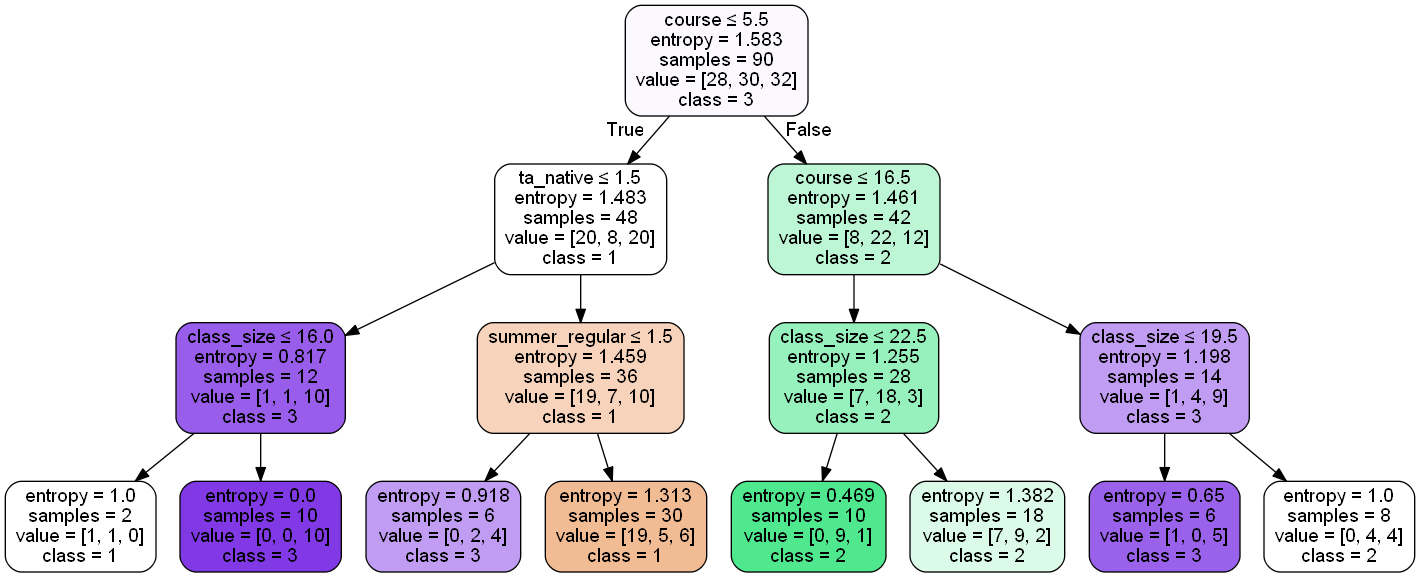

In [18]:
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tempo.png')
Image(graph.create_png())